In [ ]:
#1234567890123456789012345678901234567890123456789012345678901234567890123456789

# Module 4 - Working With Data

## Table of Contents

- 4.1 **[Reading Files with Open](#4.1)**
    - 4.1.1 [Download Data](#4.1.1)
    - 4.1.2 [Reading Text Files](#4.1.2)
    - 4.1.3 [Using <code>with</code> to Open Files](#4.1.3)
- 4.2 **[Writing Files with Open](#4.2)**
    - 4.2.1 [Writing Files](#4.2.1)
    - 4.2.2 [Copying Files](#4.2.2)
- 4.3 **[Loading Data with Pandas](#4.3)**
    - 4.3.1 [Importing csv Files](#4.3.1)
    - 4.3.2 [Importing Excel Files](#4.3.2)
    - 4.3.3 [Creating Dataframes](#4.3.3)
    - 4.3.4 [Accessing Data from Dataframes](#4.3.4)
    - 4.3.5 [Pandas Quiz](#4.3.5)
- 4.4 **[Working with and Saving Data with Pandas](#4.4)**
- 4.5 **[API's](#4.5)**
    - 4.5.1 [Speech to Text](#4.5.1)
    - 4.5.2 [Language Translator](#4.5.2)
- 4.6 **[HTTP and Requests](#4.6)**

## 4.1 Reading Files with Open <a id='4.1'></a>

### 4.1.1 Download Data <a id='4.1.1'></a>

In [5]:
# Download example file from url using wget

!wget -O data/example1.txt https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/example1.txt

--2021-01-11 22:34:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/example1.txt
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45 [text/plain]
Saving to: 'data/example1.txt'

     0K                                                       100% 44.9K=0.001s

2021-01-11 22:34:22 (44.9 KB/s) - 'data/example1.txt' saved [45/45]



### 4.1.2 Reading Text Files <a id='4.1.2'></a>

The built-in <code>open</code> function in Python can be used to read or write to files. It provides a file object that contains methods and attributes required to read, save, and manipulate the file.

In [6]:
# Read the example1.txt

example1 = "data/example1.txt"
file1 = open(example1, "r")

In [7]:
# View attributes of the file - path and name

file1.name

'data/example1.txt'

In [8]:
# View attributes of the file - mode ('r' or 'w')

file1.mode

'r'

In [9]:
# Read the file and assign it to the variable file_content

file_content = file1.read()
file_content

'This is line 1 \nThis is line 2\nThis is line 3'

In [9]:
# Print the file with '\n' as a new line

print(file_content)

This is line 1 
This is line 2
This is line 3


In [10]:
# Check type of file_content

type(file_content)

str

In [35]:
# Close the file after finishing (always necessary)

file1.close()

### 4.1.3 Using <code>with</code> to Open Files <a id='4.1.3'></a>

It is best practice to use the <code>with</code> statement when opening a file. This ensures the file will automatically close after running code in the indent block, even if an exception is raised. 

In [12]:
# Open file using with statement

with open(example1, "r") as file1:
    file_content = file1.read()
    print(file_content)

This is line 1 
This is line 2
This is line 3


In [14]:
# Verify the file was closed automatically

file1.closed

True

In [16]:
# View the info extracted from the file in the variable file_content

print(file_content)

This is line 1 
This is line 2
This is line 3


In [17]:
# Read the first four characters of the file

with open(example1, "r") as file1:
    print(file1.read(4))

This


Once the method <code>.read(4)</code> is called, the first characters are printed. If we call the method again, the subsequent characters will be called. See the examples below:

In [18]:
# Read characters from a file sequentially

with open(example1, "r") as file1:
    print(file1.read(4))
    print(file1.read(4))
    print(file1.read(7))
    print(file1.read(15))

This
 is 
line 1 

This is line 2


In [19]:
# Read a different number of characters from the file

with open(example1, "r") as file1:
    print(file1.read(16))
    print(file1.read(5))
    print(file1.read(9))

This is line 1 

This 
is line 2


One line of a file at a time can be read using the method <code>readline()</code>:

In [22]:
# Read one line at a time using readline()

with open(example1, "r") as file1:
    print("The first line is:", file1.readline())

The first line is: This is line 1 



A loop can be used to iterate through each line:

In [24]:
# Iterate through each line of a file

with open(example1, "r") as file1:
    i = 0
    for line in file1:
        print("Iteration", str(i), ":", line)
        i = i + 1

Iteration 0 : This is line 1 

Iteration 1 : This is line 2

Iteration 2 : This is line 3


The method <code>readlines()</code> can be used to save the file to a list:

In [29]:
# Read all lines and save as a list

with open(example1, "r") as file1:
    file_list = file1.readlines()

print(file_list)

['This is line 1 \n', 'This is line 2\n', 'This is line 3']


In [28]:
# Each element of the list corresponds to a line

print(file_list[0])
print(file_list[1])
print(file_list[2])

This is line 1 

This is line 2

This is line 3


## 4.2 Writing Files with Open <a id='4.2'></a>

### 4.2.1 Writing Files <a id='4.2.1'></a>

Use the method <code>write()</code> to create a text file and save a line to it:

In [43]:
# Create example2.txt and use write() to write a line

example2 = "data/example2.txt"

with open(example2, 'w') as file2:
    file2.write("A world of dew,")

In [49]:
# Write multiple lines to the file

with open(example2, 'w') as file2:
    file2.write("A world of dew,\n")
    file2.write("And within every dewdrop\n")

The method <code>.write()</code> works similarly to the method <code>.readline()</code>, except it writes a new line rather than reading it.

In [50]:
# Read the file to confirm

with open(example2, 'r') as file2:
    print(file2.read())

A world of dew,
And within every dewdrop



The mode argument <code>'a'</code> is used to append a new line to the file, rather than rewriting it entirely:

In [51]:
# Append a line to the file

with open(example2, 'a') as file2:
    file2.write("A world of struggle.\n")

In [52]:
# Verify the file has been added to

with open(example2, 'r') as file2:
    print(file2.read())

A world of dew,
And within every dewdrop
A world of struggle.



A list can be written to a text files as follows:

In [53]:
# Create a list

haiku_list = ["Autumn moonlight-\n", "a worm digs silently\n", 
              "into the chestnut.\n"]
haiku_list

['Autumn moonlight-\n', 'a worm digs silently\n', 'into the chestnut.\n']

In [54]:
# Write the elements of the list to a text file

example3 = 'data/example3.txt'
with open(example3, 'w') as file3:
    for line in haiku_list:
        print(line)
        file3.write(line)

Autumn moonlight-

a worm digs silently

into the chestnut.



In [55]:
# Verify the file containing list data was created successfully

with open(example3, 'r') as file3:
    print(file3.read())

Autumn moonlight-
a worm digs silently
into the chestnut.



In [57]:
# Append a line to the file

with open(example3, 'a') as file3:
    file3.write("- Matsuo Basho\n")

In [58]:
# Verify the line was appended

with open(example3, 'r') as file3:
    print(file3.read())

Autumn moonlight-
a worm digs silently
into the chestnut.
- Matsuo Basho



### 4.2.2 Copying Files <a id='4.2.2'></a>

In [59]:
# Copy example3 to another file

with open(example3, 'r') as readfile:
    with open('data/haiku.txt', 'w') as writefile:
        for line in readfile:
            writefile.write(line)

In [60]:
# Verify the copy was successful

with open('data/haiku.txt', 'r') as file4:
    print(file4.read())

Autumn moonlight-
a worm digs silently
into the chestnut.
- Matsuo Basho



## 4.3 Loading Data with Pandas <a id='4.3'></a>

Dependencies or libraries are pre-written code to help solve problems. Pandas is a popular library for data analysis. To start using a library or dependency such as pandas, we use the import command:

In [5]:
# Import pandas using pd as an abbreviation

import pandas as pd

### 4.3.1 Import csv file <a id='4.3.1'></a>

In [6]:
# Import csv file

csv_path = 'data/game-data.csv'
game_df = pd.read_csv(csv_path)
game_df

,Title,Developer,Genre,Release Year,Steam Rating
0,Shadow of the Tomb Raider,Eidos-Montreal,Adventure,2018,84%
1,Fallout 4,Bethesda Game Studios,RPG,2015,78%
2,Cyberpunk 2077,CD PROJEKT RED,RPG,2020,79%
3,Apex Legends,Respawn Entertainment,Action,2019,93%
4,Among Us,Innersloth,Casual,2018,95%
5,Phasmophobia,Kinetic Games,Action,2020,97%
6,Grand Theft Auto V,Rockstar North,Action,2015,81%
7,The Witcher 3: Wild Hunt,CD PROJEKT RED,RPG,2015,98%
8,Dark Souls III,"FromSoftware, Inc.",Action,2016,93%


In [7]:
# Use head() method to examine first n rows (default n=5) of a dataframe

game_df.head()

,Title,Developer,Genre,Release Year,Steam Rating
0,Shadow of the Tomb Raider,Eidos-Montreal,Adventure,2018,84%
1,Fallout 4,Bethesda Game Studios,RPG,2015,78%
2,Cyberpunk 2077,CD PROJEKT RED,RPG,2020,79%
3,Apex Legends,Respawn Entertainment,Action,2019,93%
4,Among Us,Innersloth,Casual,2018,95%


### 4.3.2 Import Excel File <a id='4.3.2'></a>

In [8]:
# Import excel file and view a part using head()

xlsx_path = 'data/game-data.xlsx'
game_df2 = pd.read_excel(xlsx_path)
game_df2.head(3)

,Title,Developer,Genre,Release Year,Steam Rating
0,Shadow of the Tomb Raider,Eidos-Montreal,Adventure,2018,0.84
1,Fallout 4,Bethesda Game Studios,RPG,2015,0.78
2,Cyberpunk 2077,CD PROJEKT RED,RPG,2020,0.79


### 4.3.3 Creating Dataframes <a id='4.3.3'></a>

In [9]:
# Create a new dataframe with column and index labels

df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                 index=['cobra', 'viper', 'sidewinder'],
                 columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [10]:
# Create a dataframe from a dictionary - Make the dictionary

songs = {'Album':['Thriller', 'Back in Black', 'The Dark Side of the Moon',
                  'The Bodyguard', 'Bat Out of Hell'],
         'Released':[1982, 1980, 1973, 1992, 1977],
         'Length':['00:42:19', '00:42:11', '00:42:29', '00:57:44', '00:46;33']}
songs

{'Album': ['Thriller',
  'Back in Black',
  'The Dark Side of the Moon',
  'The Bodyguard',
  'Bat Out of Hell'],
 'Released': [1982, 1980, 1973, 1992, 1977],
 'Length': ['00:42:19', '00:42:11', '00:42:29', '00:57:44', '00:46;33']}

In [11]:
# Cast the dictionary to a dataframe

songs_frame = pd.DataFrame(songs)
songs_frame

,Album,Released,Length
0,Thriller,1982,00:42:19
1,Back in Black,1980,00:42:11
2,The Dark Side of the Moon,1973,00:42:29
3,The Bodyguard,1992,00:57:44
4,Bat Out of Hell,1977,00:46;33


### 4.3.4 Accessing Data from Dataframes <a id='4.3.4'></a>

In [12]:
# Create a new dataframe from a single column of an existing dataframe

dev_df = game_df[['Developer']]
dev_df.head()

,Developer
0,Eidos-Montreal
1,Bethesda Game Studios
2,CD PROJEKT RED
3,Respawn Entertainment
4,Innersloth


In [13]:
# Get a column as a series

dev_df2 = game_df['Developer']
dev_df2

0           Eidos-Montreal
1    Bethesda Game Studios
2           CD PROJEKT RED
3    Respawn Entertainment
4               Innersloth
5            Kinetic Games
6           Rockstar North
7           CD PROJEKT RED
8       FromSoftware, Inc.
Name: Developer, dtype: object

In [57]:
# Create a new dataframe from a number of selected columns

ratings_df = game_df[['Title', 'Steam Rating']]
ratings_df.head()

,Title,Steam Rating
0,Shadow of the Tomb Raider,84%
1,Fallout 4,78%
2,Cyberpunk 2077,79%
3,Apex Legends,93%
4,Among Us,95%


In [27]:
# Access the data from one cell of a dataframe using index

game_df.iloc[1,0]

'Fallout 4'

In [14]:
# Access a single value from one cell using labels

game_df.loc[0, 'Genre']

'Adventure'

In [31]:
# Slice a dataframe to select a section using index

game_df.iloc[0:3, 0:4]

,Title,Developer,Genre,Release Year
0,Shadow of the Tomb Raider,Eidos-Montreal,Adventure,2018
1,Fallout 4,Bethesda Game Studios,RPG,2015
2,Cyberpunk 2077,CD PROJEKT RED,RPG,2020


In [76]:
# Access a column using label

game_df.loc[:,'Genre']

0    Adventure
1          RPG
2          RPG
3       Action
4       Casual
5       Action
6       Action
7          RPG
8       Action
Name: Genre, dtype: object

### 4.3.5 Pandas Quiz <a id='4.3.5'></a>

In [15]:
# Import the excel file for the following exercises

xlsx_path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%204/Datasets/TopSellingAlbums.xlsx'

df = pd.read_excel(xlsx_path)
df.head()

,Artist,Album,Released,Length,Genre,Music Recording Sales (millions),Claimed Sales (millions),Released.1,Soundtrack,Rating
0,Michael Jackson,Thriller,1982,00:42:19,"pop, rock, R&B",46.0,65,1982-11-30,NaN,10.0
1,AC/DC,Back in Black,1980,00:42:11,hard rock,26.1,50,1980-07-25,NaN,9.5
2,Pink Floyd,The Dark Side of the Moon,1973,00:42:49,progressive rock,24.2,45,1973-03-01,NaN,9.0
3,Whitney Houston,The Bodyguard,1992,00:57:44,"R&B, soul, pop",27.4,44,1992-11-17,Y,8.5
4,Meat Loaf,Bat Out of Hell,1977,00:46:33,"hard rock, progressive rock",20.6,43,1977-10-21,NaN,8.0


In [17]:
# Use variable 'q' to store the column 'Rating' as a dataframe

q = df[['Rating']]
q

,Rating
0,10.0
1,9.5
2,9.0
3,8.5
4,8.0
5,7.5
6,7.0
7,6.5


In [18]:
# Assign the variable 'q' to a dataframe containing 'Released' and 'Artist'

q = df[['Released', 'Artist']]
q

,Released,Artist
0,1982,Michael Jackson
1,1980,AC/DC
2,1973,Pink Floyd
3,1992,Whitney Houston
4,1977,Meat Loaf
5,1976,Eagles
6,1977,Bee Gees
7,1977,Fleetwood Mac


In [19]:
# Access the 2nd row and 3rd column of 'df'

df.iloc[1, 2]

1980

In [11]:
# Use the following dataframe 'df' for the next exercises

df = pd.DataFrame({'a':[11, 21, 31], 'b':[20, 22, 23]})

In [12]:
# Plot the first three rows

df.head(3)

,a,b
0,11,20
1,21,22
2,31,23


In [8]:
# Obtain column 'a'

df['a']

0    11
1    21
2    31
Name: a, dtype: int64

In [9]:
# Consider the dataframe df, how would you find the element in the second row 
# and first column?

df.iloc[1,0]

21

## 4.4 Working with and Saving Data with Pandas <a id='4.4'></a>

When we have a dataframe we can work with the data and save the results in other formats. Pandas has methods to manipulate data, such as the unique method:

In [41]:
# Use unique method to determine unique elements in a column of a dataframe

game_df['Release Year'].unique()

array([2018, 2015, 2020, 2019, 2016], dtype=int64)

In [42]:
# Show which rows have a release year of 2019 or later

game_df['Release Year'] >= 2019

0    False
1    False
2     True
3     True
4    False
5     True
6    False
7    False
8    False
Name: Release Year, dtype: bool

In [55]:
# Make a new dataframe of games with a release year of 2019 or later

new_game_df = game_df[game_df['Release Year'] >= 2019]
new_game_df

,Title,Developer,Genre,Release Year,Steam Rating
2,Cyberpunk 2077,CD PROJEKT RED,RPG,2020,79%
3,Apex Legends,Respawn Entertainment,Action,2019,93%
5,Phasmophobia,Kinetic Games,Action,2020,97%


In [53]:
new_game_df.iloc[0,0]

'Cyberpunk 2077'

### 4.4.1 Save Dataframe to csv File <a id='4.4.1'></a>

In [50]:
# Save the new dataframe to a csv file without retaining former index

new_game_df.to_csv('data/new-game.csv', index=False)

In [51]:
# Confirm it was saved using the read_csv method

check_game_df = pd.read_csv('data/new-game.csv')
check_game_df

,Title,Developer,Genre,Release Year,Steam Rating
0,Cyberpunk 2077,CD PROJEKT RED,RPG,2020,79%
1,Apex Legends,Respawn Entertainment,Action,2019,93%
2,Phasmophobia,Kinetic Games,Action,2020,97%


### 4.4. Pandas Quiz 2 <a id='4.4.'></a>

In [2]:
# Use this dataframe 'df' for the following exercises

import pandas as pd

df = pd.DataFrame({'a':[1, 2, 1],'b':[1, 1, 1]})
df

,a,b
0,1,1
1,2,1
2,1,1


In [33]:
# Find the unique values in column 'a'

df['a'].unique()

array([1, 2], dtype=int64)

In [36]:
# Return a dataframe with only the rows where column 'a' is less than two

df1 = df[df['a'] <= 1]
df1

,a,b
0,1,1
2,1,1


In [3]:
#consider the dataframe what type does the following return df['a']==1

df = pd.DataFrame({'a':[1, 2, 1],'b':[1, 1, 1]})

df['a'] == 1

0     True
1    False
2     True
Name: a, dtype: bool

## 4.5 API's <a id='4.5'></a>

In [1]:
# Import the IBM Watson library

!pip install ibm_watson wget

### 4.5.1 Speech to Text <a id='4.5.1'></a>

In [7]:
pip install PyJWT==1.7.1

In [7]:
# Import SpeechToTextV1 from ibm_watson and insert url and API key

import json
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [8]:
# Import the API key and URL stored in config file
# First method of authentication to study, second method will be used for 
# Language Translator

import config
stt_api = config.stt_api
stt_url = config.stt_url

authenticator = IAMAuthenticator(stt_api)
s2t = SpeechToTextV1(authenticator=authenticator)
s2t.set_service_url(stt_url)
s2t

In [49]:
# Download audio file that will be used to convert to text

!wget -O data/PolynomialRegressionandPipelines.mp3 https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/PolynomialRegressionandPipelines.mp3

--2021-01-09 16:20:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/PolynomialRegressionandPipelines.mp3
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4234179 (4.0M) [audio/mpeg]
Saving to: 'data/PolynomialRegressionandPipelines.mp3'

     0K .......... .......... .......... .......... ..........  1%  225K 18s
    50K .......... .......... .......... .......... ..........  2% 4.16M 9s
   100K .......... .......... .......... .......... ..........  3%  427K 9s
   150K .......... .......... .......... .......... ..........  4% 4.82M 7s
   200K .......... .......... .......... .......... ..........  6%  613K 7s
   250K .......... .......... .......... .......... ..........  7% 2.84M 6s

In [9]:
# Set the path of the wav file

filename = 'data/PolynomialRegressionandPipelines.mp3'

In [10]:
# Use open to create the file object in binary mode 'rb'

with open(filename, 'rb') as wav:
    response = s2t.recognize(audio=wav, content_type='audio/mp3')

In [11]:
# The attribute 'result' contains a dictionary that includes the translation

response.result

{'result_index': 0,
 'results': [{'final': True,
   'alternatives': [{'transcript': 'in this video we will cover polynomial regression and pipelines ',
     'confidence': 0.94}]},
  {'final': True,
   'alternatives': [{'transcript': "what do we do when a linear model is not the best fit for our data let's look into another type of regression model the polynomial regression we transform our data into a polynomial then use linear regression to fit the parameters that we will discuss pipelines pipelines are way to simplify your code ",
     'confidence': 0.9}]},
  {'final': True,
   'alternatives': [{'transcript': "polynomial regression is a special case of the general linear regression this method is beneficial for describing curvilinear relationships what is a curvilinear relationship it's what you get by squaring or setting higher order terms of the predictor variables in the model transforming the data the model can be quadratic which means the predictor variable in the model is squar

In [15]:
import pandas as pd

pd.json_normalize(response.result['results'], 'alternatives')

,transcript,confidence
0,in this video we will cover polynomial regress...,0.94
1,what do we do when a linear model is not the b...,0.90
2,polynomial regression is a special case of the...,0.95
3,the model can be cubic which means the predict...,0.95
4,there also exists higher order polynomial regr...,0.91
5,let's look at an example from our data we gene...,0.89
6,in python we do this by using the poly fit fun...,0.92
7,negative one point five five seven X. one cute...,0.90
8,consider the feature shown here applying the m...,0.90
9,pipeline sequentially perform a series of tran...,0.89


In [16]:
response

In [17]:
# We can obtain the recognized text and assign it to a variable

recognized_text = response.result['results'][0]['alternatives'][0]['transcript']
type(recognized_text)

str

## 4.5.2 Language Translator <a id='4.5.2'></a>

In [18]:
# Import Language Translator V3 from IBM Watson

from ibm_watson import LanguageTranslatorV3

In [19]:
# Create language_translator object
# Using ibm-credentials.env authentication method

language_translator = LanguageTranslatorV3(version='2018-05-01')
language_translator

In [20]:
# Get a list of languages the service can identify

pd.json_normalize(language_translator
                  .list_identifiable_languages()
                  .get_result(), 'languages')

,language,name
0,af,Afrikaans
1,ar,Arabic
2,az,Azerbaijani
3,ba,Bashkir
4,be,Belarusian
...,...,...
71,uk,Ukrainian
72,ur,Urdu
73,vi,Vietnamese
74,zh,Simplified Chinese


In [21]:
# Use the method translate to translate the text

translation_response = language_translator.translate(
    text = recognized_text, model_id = 'en-ja')
translation_response

In [22]:
# Result is a dictionary

translation = translation_response.get_result()
translation

{'translations': [{'translation': 'このビデオで私たちは多項式の回帰とパイプラインを対象とする '}],
 'word_count': 10,
 'character_count': 64}

In [23]:
# Obtain the translation as a string

ja_translation = translation['translations'][0]['translation']
ja_translation

'このビデオで私たちは多項式の回帰とパイプラインを対象とする '

In [27]:
# Translate back to English

new_translation = language_translator.translate(text=ja_translation, 
                                               model_id='ja-en').get_result()

In [28]:
# Get translation as a string

en_translation = new_translation['translations'][0]['translation']
en_translation

'In this video, we target the regression and pipeline of polynomials '

In [30]:
# Convert to french

fr_translation = language_translator.translate(text = en_translation, model_id = 'en-fr').get_result()
fr_translation['translations'][0]['translation']

'Dans cette vidéo, nous ciblons la régression et le pipeline de polynômes '

## 4.6 HTTP and Requests <a id='4.6'></a>

When a HTTP request is made, a HTTP method is sent to tell the server what action to perform. HTTP methods include GET (retrieves data from server), POST (submits data to server), PUT (updates data already on server) and DELETE (deletes data from server).

The process to use the HTTP protocol in python can be divided into request and response. To request we use the GET method, with the location of the resource and the HTTP version. The request header passes additional information:

Request start line: 

<code>Get/index.html HTTP/1.0</code>

Request header: 

<code>User-Agent: python-requests/2.21.0
Accept-Encoding: gzip, deflate
:</code>

The response start line contains the HTTP version, a status code (200 means successful), followed by a status discription (OK). The response header contains other useful information. Finally the response body contains the requested file in HTML format:

Response start line:

<code>HTTP/1.0 200 OK</code>

Response header:

<code>Server: Apache-
Cache: UNCACHEABLE</code>

Response body:

<code>\<!DOCTYPE html>
\<html>
\<body>
\<h1>First Heading</h1>
\<p>First paragraph would go here.</p>
\</body>
\</html></code>

Status code examples:

1xx - Informational<br>
2xx - Success<br>
&emsp;200 - OK<br>
3xx - Redirection<br>
&emsp;300 - Multiple Choices<br>
4xx - Client Error<br>
&emsp;401 - Unauthorized<br>
&emsp;403 - Forbidden<br>
&emsp;404 - Not Found<br>

### 4.6.1 Making Requests <a id='4.6.1'></a>

In [2]:
# Import the python library that allows for sending HTTP requests easily

import requests

In [3]:
# Import additional libraries

import os
from PIL import Image
from IPython.display import IFrame

In [33]:
# Make GET request

url = 'https://www.google.com'
r = requests.get(url)

In [34]:
# The response object r contains information about the request

r.status_code

200

In [35]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [36]:
# View request body

print('Request body:', r.request.body)

Request body: None


In [37]:
# View HTTP response header

header = r.headers
print(r.headers)

{'Date': 'Mon, 11 Jan 2021 07:56:38 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2021-01-11-07; expires=Wed, 10-Feb-2021 07:56:38 GMT; path=/; domain=.google.com; Secure, NID=206=HlFqGODdMe88nGE56LeIYghDnLQNeq90mucD6qcdXFcwvQelKtMrTd2V4N7sNUATgc8NW0E218b4rVFME3vCf3o2dVOZ1I5Bj9vmsYcccOuI7hjd1k20tjHN32JrtgKuGW-c1vc63uHgBXUji2ibJSroYqAnG-vIlr1qwQEpl-8; expires=Tue, 13-Jul-2021 07:56:38 GMT; path=/; domain=.google.com; HttpOnly', 'Alt-Svc': 'h3-29=":443"; ma=2592000,h3-T051=":443"; ma=2592000,h3-Q050=":443"; ma=2592000,h3-Q046=":443"; ma=2592000,h3-Q043=":443"; ma=2592000,quic=":443"; ma=2592000; v="46,43"', 'Transfer-Encoding': 'chunked'}


In [41]:
# Obtain the date the request was sent

header['date']

'Mon, 11 Jan 2021 07:56:38 GMT'

In [42]:
# Indicate the type of data

header['Content-Type']

'text/html; charset=ISO-8859-1'

In [43]:
# Check the encoding

r.encoding

'ISO-8859-1'

In [44]:
# As type is text/html the attribute text can be used to display the first 100
# characters of the HTML in the body

r.text[0:100]

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ja"><head><meta content'

In [45]:
# Load other types of data, images etc.

url = 'https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png'

In [48]:
# Make a get request

r = requests.get(url)

In [49]:
# Check the response header

print(r.headers)

{'Date': 'Mon, 11 Jan 2021 10:25:27 GMT', 'Content-Type': 'image/png', 'Content-Length': '21590', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d41bcbc94fd557e63a48ac43d9f14156d1610360726; expires=Wed, 10-Feb-21 10:25:26 GMT; path=/; domain=.gitlab.com; HttpOnly; SameSite=Lax; Secure', 'Cache-Control': 'max-age=60, public', 'Content-Disposition': 'inline', 'Etag': 'W/"c26d88d0ca290ba368620273781ea37c"', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'DENY', 'X-Gitlab-Feature-Category': 'source_code_management', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Request-Id': '01EVRFJS2BAZDCN9ZK9S13DV27', 'X-Runtime': '0.055524', 'X-Ua-Compatible': 'IE=edge', 'X-Xss-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=31536000', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'GitLab-LB': 'fe-10-lb-gprd', 'GitLab-SV': 'web-10-sv-gprd', 'CF-Cache-Status': 'REVALIDATED', 'Accept-Ranges': 'bytes', 'cf-request-id': '079293bd000

In [50]:
# Check content type

r.headers['Content-Type']

'image/png'

In [51]:
# Save the image as a file object

path = os.path.join(os.getcwd(), 'data\image.png')
path

'C:\\Users\\kiss_\\Documents\\Python\\IBM-Python-Basics-Data-Science\\Mod4-Working-With-Data\\data\\image.png'

In [52]:
# Save the content of the file using the open function and write method

with open(path, 'wb') as f:
    f.write(r.content)

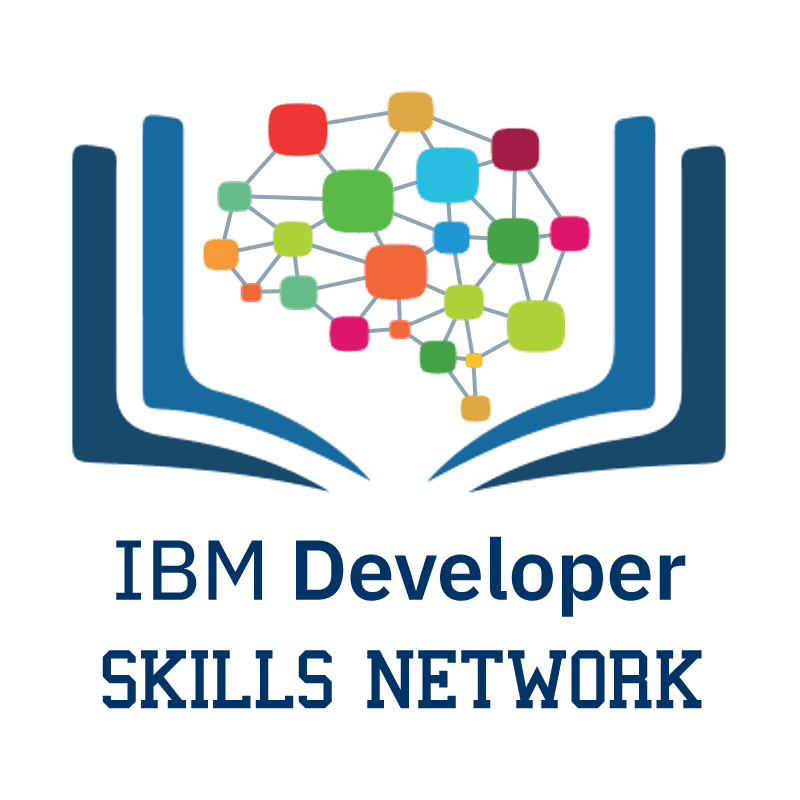

In [54]:
# View the image

Image.open(path)

### 4.6.2 Get Request with URL Parameters <a id='4.6.2'></a>

The get method can be used to retrieve data from an API. The base URL is the server (e.g. httpbin.org) and /get is appended as the route to indicate we would like to perform a GET request.

In [58]:
%%javascript
Jupyter.utils.autoLinkUrls = function (txt) {
    return txt;
}

<IPython.core.display.Javascript object>

In [59]:
# Set the url for a simple HTTP request and response service
url_get = 'http://httpbin.org/get'

A query string is part of a URL, and sends additional information to the web server. The start of the query is <code>?</code> followed by a series of parameter and value pairs.

<code>http://httpbin.org/get?Name=Joseph&ID=123</code>

<code>Start of query: ?
Parameter name: name
Value: Joseph
Parameter name: ID
Value: 123
</code>

In [60]:
# Create a dictionary

payload = {'name':'Joseph','ID':'123'}

In [61]:
# Pass dictionary to the params parameter of the get function

r = requests.get(url_get, params = payload)

### 4.6.3 HTTP and Requests Quiz <a id='4.6.3'></a>

In [10]:
# Retrieve the text file from the web server

url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/example1.txt'
path = os.path.join(os.getcwd(), 'data\http-example1.txt')
r = requests.get(url)
with open(path, 'wb') as f:
    f.write(r.content)